# Python for STEM - Week 2 (Advanced)  

## Day 3 - Part 2: Supervised learning - classification

In this notebook, we will focus on examples of supervised machine learning. More specifically, we will be doing classification using Scikit-learn, one of the machine learning packages in Python. Before we start, here we first import all the packages that we need for this notebook. 

All the machine learning functions we will use in Day 3 and Day 4 all comes from [scikit-learn](https://scikit-learn.org/stable/index.html). You can find very detailed descriptions on many machine learning models included in the package user guide and various examples. This would be a good place to start when you want to adopt machine learning for your own research/work.  




In [ ]:
## In this cell, we import all the packages needed for this notebook
import numpy as np                  ## packages for data handling
import pandas as pd                 
from scipy.spatial.distance import cdist 
import matplotlib.pyplot as plt     ## packages for visualization 
import seaborn as sbn 


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Data ingest  
In this notebook, we will use a dataset from geography/remote sensing. The data includes 1875 data points (locations) in the western North Carolina (Asheville region). Each row of the data contains the information of a point with its latitude/longitude, land cover type (forest, crop, urban, or water), and the surface reflectance data of six channels from the OLI sensor onboard USGS/NASA Land resource satellite Landsat-8. The reflectance data provide unique feature of the land surface as seen by the satellite sensor, which allows geographer understand how the surface is changing through time. To find more information about the data and satellite, you can visit USGS website about [Landsat-8 OLI data.](https://www.usgs.gov/land-resources/nli/landsat/landsat-8?qt-science_support_page_related_con=0#qt-science_support_page_related_con)

In [ ]:
## First we use pandas to read in the comma separated values (CSV) file
datafile = 'https://raw.githubusercontent.com/geo-yrao/STEM_Python_Course/geo-yrao-patch-1/02_Week2/Data/03_land_use_land_cover_asheville.csv'
AVLData = pd.read_csv(datafile, index_col=None)

## We will check the first five rows of the data to have initial understadning of our data
print( AVLData.head() )

    Latitude  Longitude  Class   B1   B2   B3   B4    B5    B6
0  35.514769 -82.680451      0  127  150  550  226  3609  1441
1  35.753979 -82.520432      0   81  115  426  170  2913  1110
2  35.710635 -82.305661      0  156  220  538  477  2492  2077
3  35.512814 -82.413861      0  245  280  663  507  2732  1531
4  35.520636 -82.853181      0  148  181  534  265  3320  1457


In this dataset, **Class** refers to the land cover type, **B1** ~ **B6** are the surface reflectances of the sixe OLI channels. The table below explains what the class code represents.

| Class No. | Land Cover Type |
|-:|-:|
|0|Forest| 
|1|Crop|
|2|Development/Urban|
|3|Water|

Additionally, the following table gives us a quick explaination of what are the six OLI channels.  

| Channel No. | Channel Name | Wavelength |
|-:|-:|:-:|
|B1|Coastal/Areasol|0.433 – 0.453 μm| 
|B2|Blue|0.450 – 0.515 μm|
|B3|Green|0.525 – 0.600 μm|
|B4|Red|0.630 – 0.680 μm|
|B5|Near Infrared|0.845 – 0.885 μm|
|B6|Short Wavelength Infrared|1.560 – 1.660 μm|  

Typically, refletance value is between 0 and 1, describing the percentage of light reflected by the surface. The reflectance value in our data is the scaled value between 0 and 10000. You can simply convert it back to regular reflectance by multiplying 0.0001.   


In this notebook, we are doing clustering, so the **Class** information is not relevant because we are trying to guess how many clusters that we have based on this dataset. So let's assume that we do not have the land cover information.

    B1   B2   B3   B4    B5    B6
0  127  150  550  226  3609  1441
1   81  115  426  170  2913  1110
2  156  220  538  477  2492  2077
3  245  280  663  507  2732  1531
4  148  181  534  265  3320  1457


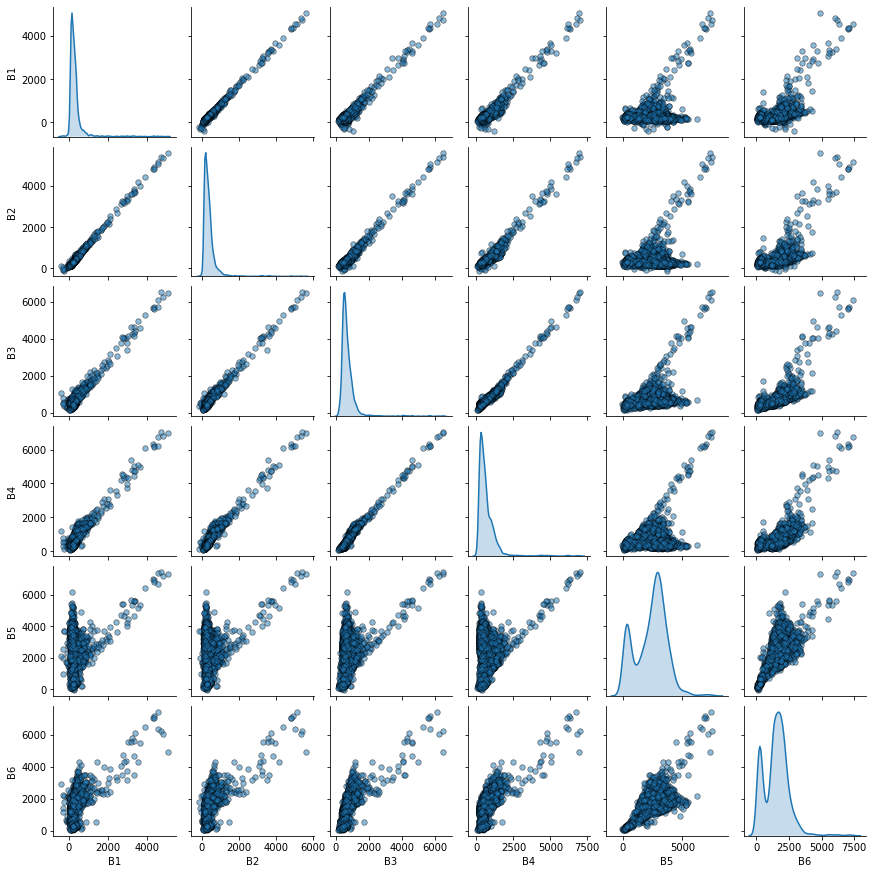

In [ ]:
## Now we have a simple matrix with six columns (attributes)
## X is the new pandas data.frame with only the six channel reflectance
X = AVLData.iloc[:,3:]
print( X.head() )
## We are now looking at the pairwise scatter plots between these six channels
## using seaborn.pairplot function to look at them in one bix plot.
## We are using "alpha" key word to change the transparency for the dots since
## there are many overlapping amongst the data.
sbn.pairplot(X, diag_kind = 'kde',
             plot_kws = {'alpha': 0.5, 's': 30, 'edgecolor': 'k'},
             height = 2)

## Feature transformation/extraction

As we can see from the pairwise scatter plots, the current six channels share some strong correlation amongst them. Can we find more useful features based on these six original channels? 

Feature transformation/extraction is the process to reduce the dimensionality of the data to explain the most of the variances in the data. Principle Component Analysis (PCA) is one of these techniques.

In [ ]:
## Using PCA function from scikit-learn to perform feature transformation
from sklearn.decomposition import PCA
pca_AVL = PCA(n_components=6)
principalComponents_X = pca_AVL.fit_transform(X)
print( principalComponents_X )
## The outcome of PCA is a ndarry here

[[ 5.00341092e+02 -1.22573544e+03  3.72328477e+02 -1.64411823e-02
   4.50885226e+01 -2.03336955e+01]
 [-2.21659283e+02 -9.25161157e+02  3.17125116e+02  2.19860338e+00
   1.53053371e+01 -4.17195944e+00]
 [ 1.67132531e+02 -3.67653622e+02 -5.56454078e+02 -1.00973894e+02
   1.87738100e+01 -5.61167762e+00]
 ...
 [-2.14575117e+03  5.31458988e+02  1.47239181e+02 -5.88218542e+01
   5.08726843e+01 -1.84707008e+00]
 [-2.36449196e+03  7.66382044e+02  8.18981552e+01 -1.02668392e+02
  -2.56208761e+01  7.00686065e+00]
 [-2.25581846e+03  8.45834161e+02  9.47832913e+01  2.61237015e+01
   1.18950574e+00 -1.20772810e+01]]


In [ ]:

## we convert the ndarry to pandas data.frame with specified column names
## for PCA
PCA_df_X = pd.DataFrame(principalComponents_X, 
                        columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])
print( PCA_df_X )


              PC1          PC2         PC3         PC4        PC5        PC6
0      500.341092 -1225.735443  372.328477   -0.016441  45.088523 -20.333695
1     -221.659283  -925.161157  317.125116    2.198603  15.305337  -4.171959
2      167.132531  -367.653622 -556.454078 -100.973894  18.773810  -5.611678
3      109.792136  -424.932387   47.504111    6.439104  29.467955 -33.465079
4      328.017829 -1018.964068  256.340903  -25.452871  27.218136 -11.016410
...           ...          ...         ...         ...        ...        ...
1870 -2434.027377   733.871805   68.651361 -113.449602 -27.900391   8.421595
1871 -2588.722010   784.495646  107.946257  -64.317190  46.377485   3.892612
1872 -2145.751169   531.458988  147.239181  -58.821854  50.872684  -1.847070
1873 -2364.491957   766.382044   81.898155 -102.668392 -25.620876   7.006861
1874 -2255.818455   845.834161   94.783291   26.123702   1.189506 -12.077281

[1875 rows x 6 columns]


In [ ]:
## We now want to know how much variance of the data is explained by each
## of the principle components.
with np.printoptions(precision=4, suppress=True):
    print('Explained variation per principal component: {}'.\
          format(pca_AVL.explained_variance_ratio_) )

Explained variation per principal component: [0.7064 0.254  0.0364 0.0025 0.0005 0.0001]


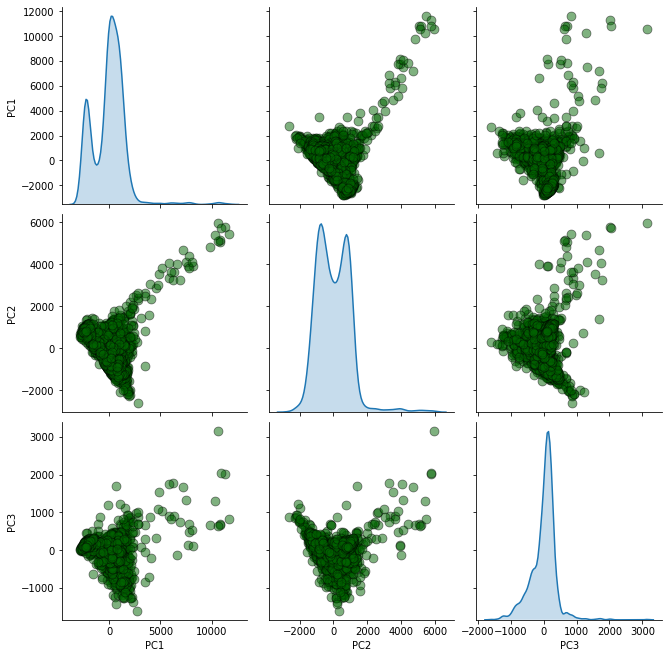

In [ ]:
## We can now visualize the first three components via the pairwise scatter 
## plot that we have done earlier.
sbn.pairplot(PCA_df_X.iloc[:,:3], diag_kind = 'kde',
             plot_kws = {'alpha': 0.5, 's': 80, 'edgecolor': 'k', 'color': 'darkgreen'},
             height = 3)

## Data spliting

For supervised learning, data spliting is the first step in order to develop and evaluation your model. 


In [ ]:
## Import function for data spliting
from sklearn.model_selection import train_test_split

## We are spliting our data set into training and testing sets based on a 80:20 ratio


When we are spliting the data, we want to make sure the training and testing dataset can resemble the distribution of these four classes in order to make sure our data can represent the reality.  


## k-Nearest neighbors (kNN)



In [ ]:
## Import packages for k-nearest neighbor classifier
from sklearn.neighbors import KNeighborsClassifier

# Initialize a KNN classifier object. Later, we'll train it and then have it predict the
# classes of withheld testing samples.


# let's train the model with k=5



# Have the newly trained classifier predict the classes of the withheld testing data.



Now we have a kNN classifier generated. We need to evaluate how the model performs based on our data. We can tabulate the predicted classes and the reference classes into a confusion matrix.

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Calculate the confusion matrix and normalized confusion matrix


# Initialize figure, axes for the two confusion matrices.


# Plot the raw counts' confusion matrix.


# Add labels to the x-axis and the y-axis.


# Plot the percentages' confusion matrix.


# Add a label to the x-axis.

# Add a title to the figure.

# Display the figure.



  

In [ ]:
## Print the accuracy matrix for the classifier


## Cross validation

If you have noticed, we fix the k-value for this k-Nearest neighbor classifier (k=9). 

1. Can we improve our overall accuracy by changing our k value in the model trianing? 

2. How can we decide which is the best k value for the model?  

To answer these questions, we need to use cross validation, a process used for finding the best model hyperparameters for a machine learning model (e.g., k for k-nearest neighbors).

To explore the optimum combination of the model hyperparameters, we typically uses the cross validation (CV) strategy. There are different type of cross validation strategy, such as, k-fold cross validation, leave-one-out cross validation, repeated cross validation. More information can be found in this [well written article about the importance of CV for machine learning](https://www.digitalvidya.com/blog/cross-validation-in-machine-learning/).  

The most commonly used CV strategy is usually [k-fold CV](https://machinelearningmastery.com/k-fold-cross-validation/). But it still depends on the data that have for your problem. If you are using time series data, your cross validation strategy will be different since you want to account for the tempooral autocorrelation within your data. Same idea applies when your data have strong spatial auto correlation. But today, let's assume that k-fold CV can solve our problem. 

The most commonly used CV strategy is usually k-fold CV. But it still depends on the data that have for your problem. If you are using time series data, your cross validation strategy will be different since you want to account for the tempooral autocorrelation within your data. Same idea applies when your data have strong spatial auto correlation. But today, let's assume that k-fold CV can solve our problem.

We can use a stratified 10-fold CV to find the optimum hyperparameters for our two classifiers (i.e., k-NN and random forest) to see if the model performance could be further improved. Let's start with k-NN to find out the best number of neighbors (k) for the model.

The idea is to repeat the model traininig 10 times using a subset (9/10) of the training data set with different value of k. The average value of the model performance metrices from these 10 iteration of model training is used to choose which hyperparameter (i.e., k) performs best.

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import GridSearchCV

# Set up the parameter grid. In this case, it's just a list of all the
# candidate number of neighbors we'll consider.

# Initialize a KNN classifier object. 


# Initialize a stratified 10-fold generator for the cross-validation.

# Create the grid search object. This object will take the kNN classifier
# and run stratified 10-fold cross-validation for each of the potential
# candidates for k. It will record the averaged accuracy for each k so
# that afterwards we can view how the classifier's accuracy improves or
# worsens with respect to k.

# Run the grid search for the optimal number of neighbors, k.


We now have a set of models and its performance based on this stratified 10-fold cross validation. Now, we can plot the model accuracy as a function of *k*. This will assist us selecting the optimum solution.

In [ ]:
## Retrieving the mean and standard deviation of the accuracy for the model test scores

## Plotting out the accuracy agiand k


Now we know that the kNN model performs best when we use k value of 9 based on our 10-fold cross validation strategy. Now we can safely train out final kNN model with k of 9 and apply it to our independent testing data that we set aside at the begining of this process.

In [ ]:
# Initialize a KNN classifier object. Later, we'll train it and then have it predict the
# classes of withheld testing samples.

# Have the final classifier predict the classes of the withheld testing data.

# Let's print out the accuracy indicators


In [ ]:
## Now, we can also visualize the testing confusion matrix
## Calculate the confusion matrix and normalized confusion matrix

# Initialize figure, axes for the two confusion matrices.

# Plot the raw counts' confusion matrix.

# Add labels to the x-axis and the y-axis.

# Plot the percentages' confusion matrix.

# Add a label to the x-axis.


# Add a title to the figure.


# Display the figure.



## Random forest  

### 2.3 - Random forest  

There are more sophiscated models that we can use to address more sophisicated classification problems. Here, we choose to introduce [random forest](https://en.wikipedia.org/wiki/Random_forest) model because of its robust performance in many applications. The random forest is an ensemble learning model by creating a suite of decision trees at training time and outputting the class that is the majority of the classes from each individual tree for classification problem. The fundamental idea of random forest  model is that the **collective power of multiple "weak" models can outperform any individual "strong" model**. It can address overfitting issue comparing to the regular decision tree model.  

Similar with k-NN, there are different flavors of random forest model. We are using the classic random forest model with *scikit-learn* package in Python (i.e., [_RandomForestClassifier_](https://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees). As the model gets more complicated, we have more to consider about the model structure, such as, how many variables we want to have as input for each tree (*max_features*), number of trees (*n_estimator*), the depth of a decision tree (*max_depth*, *min_sample_split*, *min_sample_leaf*). These could all have potential impact on our final model outcomes. 



In [ ]:
# Import the random forest classifier from sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier

# Set up the parameter grid. In this case, it's just a list of all the
# candidate number of neighbors we'll consider.


# Initialize a ra classifier object. 


# Create the grid search object. This object will take the kNN classifier
# and run stratified 10-fold cross-validation for each of the potential
# candidates for k. It will record the averaged accuracy for each k so
# that afterwards we can view how the classifier's accuracy improves or
# worsens with respect to k.


# Run the grid search for the optimal number of neighbors, k.



In [ ]:
## Print best parameter combination



In [ ]:
## Calculating the mean and standard deviation of the accuracy for the model test scores


## rearrange the accuracy data to a 2d array so we can have a heatmap

## 5 rows for max_features & 7 columns for min_samples_leaf

## Creating the heatmap for both mean accuracy and standard deviation
# Initialize figure, axes for the accuracy heatmap.


# Plot the raw counts' confusion matrix.



# Add labels to the x-axis and the y-axis.


# Plot the percentages' confusion matrix.



# Add labels to the x-axis and the y-axis.


# Add a title to the figure.


# Display the figure.



In [ ]:
## Train our final model based on our 10-fold cross validation results with the 
## best model hyperparameters


# Using the training set, we can fit our model now


# Have the newly trained classifier predict the classes of the withheld testing data.


## reporting the indicators for the random forest classifier






In [ ]:
## Calculate the confusion matrix and normalized confusion matrix


# Initialize figure, axes for the two confusion matrices.


# Plot the raw counts' confusion matrix.



# Add labels to the x-axis and the y-axis.


# Plot the percentages' confusion matrix.



# Add a label to the x-axis.


# Add a title to the figure.


# Display the figure.

